<div style=" background-color: rgb(43, 197, 37);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 6 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Analyse des données de vente en ligne pour Lapage
</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import sys
import matplotlib.ticker as ticker

print("numpy version:", np.__version__)
print("seaborn version:", sns.__version__)
print("Python version:", sys.version)
print("Python version:", datetime.__type_params__)

df_all = pd.read_csv('../Source/Data_processed/to_main.csv', sep=';', index_col=['Timestamp'] , parse_dates=True)

numpy version: 1.26.4
seaborn version: 0.13.2
Python version: 3.12.3 (v3.12.3:f6650f9ad7, Apr  9 2024, 08:18:47) [Clang 13.0.0 (clang-1300.0.29.30)]
Python version: ()


---
#### Etape 1 : exploration (cf.1.data_exploration.ipynb)
#### Etape 2 : Conversion de la colonne timestamp (cf.2.data_conversion_timestamp.ipynb)
#### Etape 3 : Jointures et colonnes calculées (cf.3.data_pre_processing.ipynb)
#### Etape 4 : tests statistiques et méthodologie (cf.4.date_statistics.ipynb)
#### Etape 5 : Analyse globale basé sur les étapes précédentes (Current File : 0.main.ipynb)


<div style="background-color: rgb(43, 197, 37);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Partie 1 - Analyse des indicateurs de vente </h2>
</div>

---
### Evolution du Lifetime Revenue
---

In [4]:
total_revenue = df_all['price'].sum()
print('Chiffre d\'affaires total : {:,.2f}'.format(total_revenue))

average_monthly_revenue = df_all['price'].resample('ME').sum()
print('Chiffre d\'affaires moyen par Mois : {:,.2f}'.format(average_monthly_revenue.mean()))

Chiffre d'affaires total : 12,027,663.10
Chiffre d'affaires moyen par Mois : 501,152.63


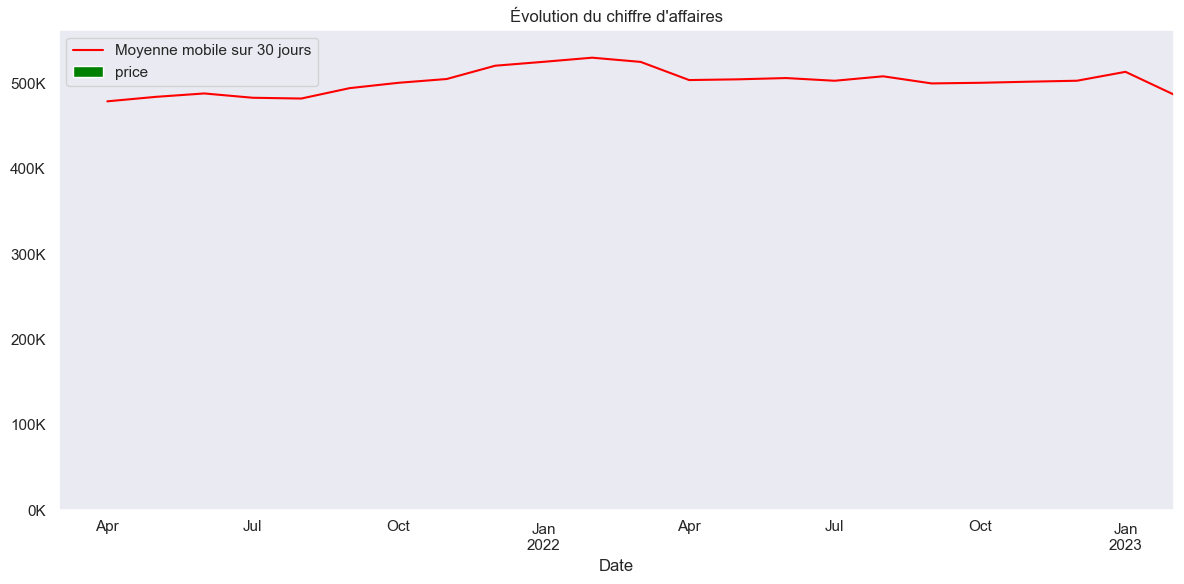

In [45]:
ventes_mois = df_all['price'].resample('ME').sum()

sns.set_theme(style="dark")

ax = ventes_mois.plot(kind='bar', color='green', figsize=(12, 6))

ventes_mois.rolling(window=2).mean().plot(label='Moyenne mobile sur 30 jours', color='red', ax=ax)

plt.title('Évolution du chiffre d\'affaires')
plt.xlabel('Date')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}K'.format(x * 1e-3)))

plt.legend()
plt.tight_layout()
plt.bar_label(ax.containers[0])
plt.show()

In [6]:
annee_1 = df_all.loc[(df_all.index >= '2021-03-01') & (df_all.index <= '2022-02-28')]
annee_2 = df_all.loc[(df_all.index >= '2022-03-01') & (df_all.index <= '2023-02-28')]

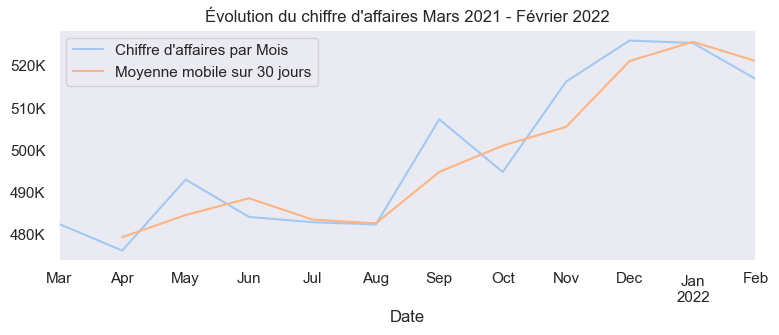

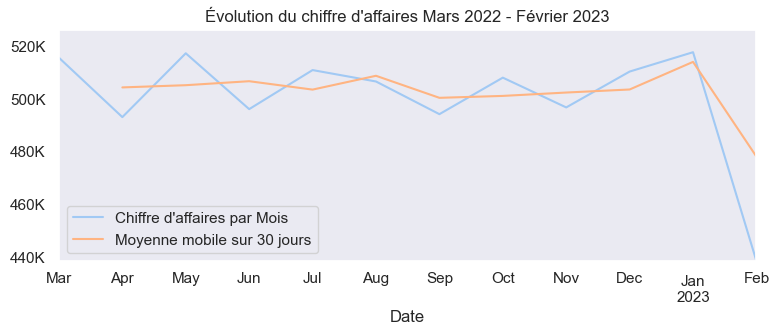

In [7]:
sns.set_theme(style="dark", palette="pastel")

plt.figure(figsize=(9, 3))
annee_1['price'].resample('ME').sum().plot(label='Chiffre d\'affaires par Mois')
annee_1['price'].resample('ME').sum().rolling(window=2).mean().plot(label='Moyenne mobile sur 30 jours')
plt.title('Évolution du chiffre d\'affaires Mars 2021 - Février 2022')
plt.xlabel('Date')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}K'.format(x * 1e-3)))
plt.legend()

plt.figure(figsize=(9, 3))
annee_2['price'].resample('ME').sum().plot(label='Chiffre d\'affaires par Mois')
annee_2['price'].resample('ME').sum().rolling(window=2).mean().plot(label='Moyenne mobile sur 30 jours')
plt.title('Évolution du chiffre d\'affaires Mars 2022 - Février 2023')
plt.xlabel('Date')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}K'.format(x * 1e-3)))

y_min = min(annee_1['price'].resample('ME').sum().min(), annee_2['price'].resample('ME').sum().min())
y_max = max(annee_1['price'].resample('ME').sum().max(), annee_2['price'].resample('ME').sum().max())
plt.gca().set_ylim(y_min, y_max)
plt.legend()
plt.show()



count    687534.000000
mean         17.493918
std          18.238337
min           0.620000
25%           8.990000
50%          13.990000
75%          19.080000
max         300.000000
Name: price, dtype: float64


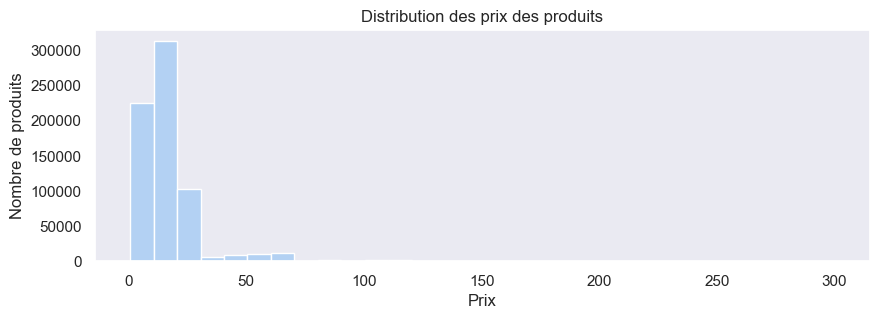

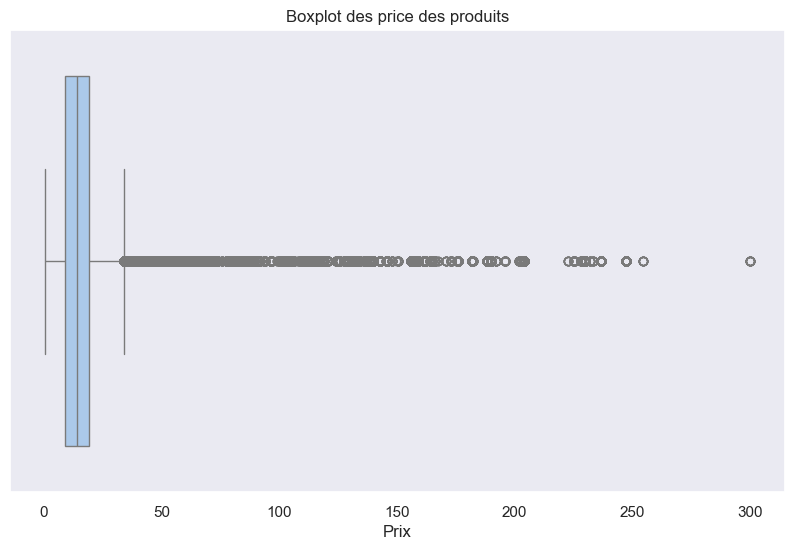

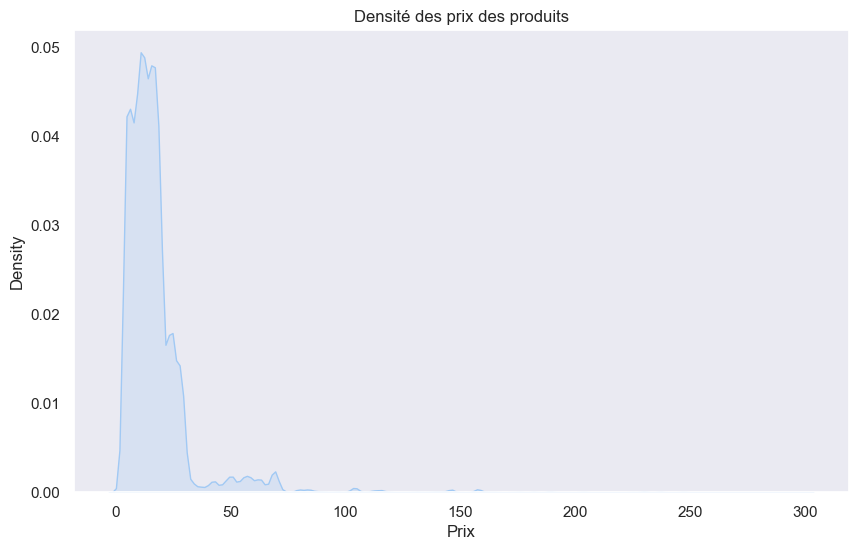

In [8]:
df = df_all[df_all['price'] > 0]  # Supprimer les prix négatifs ou nuls

print(df['price'].describe())

# 4. Histogramme
plt.figure(figsize=(10, 3))
sns.histplot(df['price'], kde=False, bins=30)
plt.title('Distribution des prix des produits')
plt.xlabel('Prix')
plt.ylabel('Nombre de produits')
plt.show()

# 5. Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'], )
plt.title('Boxplot des price des produits')
plt.xlabel('Prix')
plt.show()

# 6. Graphique de densité
plt.figure(figsize=(10, 6))
sns.kdeplot(df['price'], fill=True)
plt.title('Densité des prix des produits')
plt.xlabel('Prix')
plt.show()



In [9]:
df_all

,id_prod,session_id,client_id,sex,birth,price,categ,age,age_group,month,strat_sex_categ_mois,frequence_achat
Timestamp,,,,,,,,,,,,
2021-03-01 00:01:07.843138,0_1259,s_1,c_329,f,1967,11.99,0,56,56-65,3,0_f_3,1
2021-03-01 00:02:26.047414,0_1390,s_2,c_664,m,1960,19.37,0,63,56-65,3,0_m_3,1
2021-03-01 00:02:38.311413,0_1352,s_3,c_580,m,1988,4.50,0,35,36-45,3,0_m_3,1
2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,f,1989,6.55,0,34,26-35,3,0_f_3,1
2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,f,1956,16.49,0,67,66+,3,0_f_3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28 23:49:03.148402,1_508,s_348444,c_3573,f,1996,21.92,1,27,26-35,2,1_f_2,1
2023-02-28 23:51:29.318531,2_37,s_348445,c_50,f,1994,48.99,2,29,26-35,2,2_f_2,1
2023-02-28 23:53:18.929676,1_695,s_348446,c_488,f,1985,26.99,1,38,36-45,2,1_f_2,1


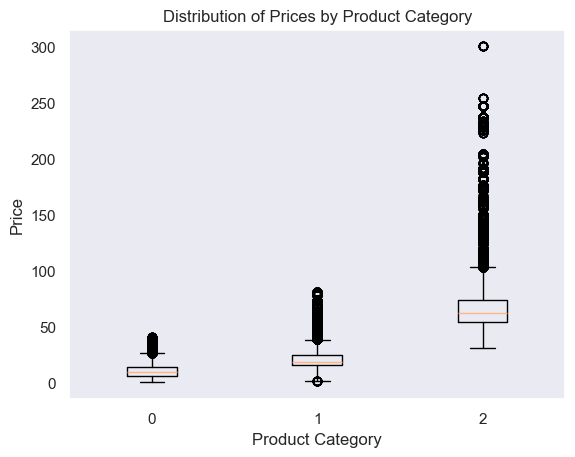

In [10]:

grouped_data = df.groupby('categ')['price'].apply(list)

# Create the boxplot
plt.boxplot(grouped_data, tick_labels=grouped_data.index)

# Set the title and labels
plt.title('Distribution of Prices by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Price')

# Show the plot
plt.show()

In [13]:
# Afficher les outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_all[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]
display(outliers)

frequence_achat = outliers[['client_id', 'frequence_achat','price']]
frequence_achat = frequence_achat.groupby('client_id').sum().sort_values(by='frequence_achat', ascending=False)
display(frequence_achat)
#frequence_achat_anormal = frequence_achat_anormal.groupby('client_id').count('frequence_achat')
#frequence_achat_anormal = frequence_achat_anormal.sort_values(by='frequence_achat', ascending=False)


,id_prod,session_id,client_id,sex,birth,price,categ,age,age_group,month,strat_sex_categ_mois,frequence_achat
Timestamp,,,,,,,,,,,,
2021-03-01 00:59:26.743244,2_153,s_29,c_2627,m,2004,139.99,2,19,19-25,3,2_m_3,1
2021-03-01 01:32:47.336658,1_564,s_38,c_1478,f,1972,62.99,1,51,46-55,3,1_f_3,1
2021-03-01 01:32:51.861159,2_62,s_39,c_184,m,2004,60.96,2,19,19-25,3,2_m_3,1
2021-03-01 01:47:08.303560,1_554,s_43,c_197,m,1980,43.09,1,43,36-45,3,1_m_3,1
2021-03-01 02:40:42.806885,2_162,s_61,c_1566,m,2004,102.82,2,19,19-25,3,2_m_3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28 21:49:18.785078,2_104,s_348404,c_6242,f,1999,43.35,2,24,19-25,2,2_f_2,1
2023-02-28 22:47:19.561667,2_37,s_348422,c_4438,f,1946,48.99,2,77,66+,2,2_f_2,1
2023-02-28 23:08:40.035146,2_13,s_348403,c_4958,m,1999,50.99,2,24,19-25,2,2_m_2,1


,frequence_achat,price
client_id,,
c_4958,3334,252030.70
c_6714,394,27606.26
c_3454,141,7175.69
c_1609,133,7460.04
c_2899,61,4409.66
...,...,...
c_5405,1,47.83
c_5385,1,38.99
c_5383,1,115.93


In [44]:
df_all[(df_all.index.year == 2022) & (df_all.index.month == 1)]

,id_prod,session_id,client_id,sex,birth,price,categ,age,age_group,month,strat_sex_categ_mois,frequence_achat
Timestamp,,,,,,,,,,,,
2022-01-01 00:04:46.203980,0_1443,s_143109,c_571,f,1984,5.99,0,39,36-45,1,0_f_1,1
2022-01-01 00:06:23.031437,0_1091,s_143097,c_3377,f,1981,9.99,0,42,36-45,1,0_f_1,1
2022-01-01 00:10:52.986913,0_1136,s_143109,c_571,f,1984,3.02,0,39,36-45,1,0_f_1,1
2022-01-01 00:11:33.958646,1_383,s_143115,c_3780,m,1953,28.99,1,70,66+,1,1_m_1,1
2022-01-01 00:12:42.113446,0_1243,s_143116,c_8383,f,1971,15.99,0,52,46-55,1,0_f_1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-31 23:47:35.726371,1_343,s_158088,c_7846,m,1985,27.99,1,38,36-45,1,1_m_1,1
2022-01-31 23:47:51.538927,1_625,s_158086,c_892,m,1977,22.99,1,46,46-55,1,1_m_1,1
2022-01-31 23:55:49.068588,1_566,s_158089,c_3745,f,1991,16.95,1,32,26-35,1,1_f_1,1
